In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('heart(1).csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

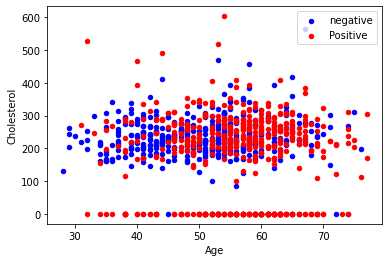

In [22]:
negative=df[df['HeartDisease']==0]
positive=df[df['HeartDisease']==1]
feed=negative.plot(kind='scatter',x='Age',y='Cholesterol',color='blue',label='negative')
positive.plot(kind='scatter',x='Age',y='Cholesterol',color='red',label='Positive',ax=feed)

In [24]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [33]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [31]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [35]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [36]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [37]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [42]:
dataMapping={
    'M':1,
    'F':0,
    'N':0,
    'Y':1,
    
}

In [39]:
df['Sex']=df['Sex'].map(dataMapping)

In [43]:
dataMapping_2={

    'N':0,
    'Y':1,
    
}
df['ExerciseAngina']=df['ExerciseAngina'].map(dataMapping_2)

In [44]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [45]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [46]:
df=pd.get_dummies(df,columns=['ChestPainType'])

In [47]:
df=pd.get_dummies(df,columns=['RestingECG'])

In [48]:
df=pd.get_dummies(df,columns=['ST_Slope'])

In [49]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [54]:
df.columns
features_df=df[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH','RestingECG_Normal','RestingECG_ST','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']]
X=np.array(features_df)
y=np.array(df['HeartDisease'])
X[0:5]

array([[ 40. ,   1. , 140. , 289. ,   0. , 172. ,   0. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ],
       [ 49. ,   0. , 160. , 180. ,   0. , 156. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ],
       [ 37. ,   1. , 130. , 283. ,   0. ,  98. ,   0. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ],
       [ 48. ,   0. , 138. , 214. ,   0. , 108. ,   1. ,   1.5,   1. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ],
       [ 54. ,   1. , 150. , 195. ,   0. , 122. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ]])

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape


(734, 18)

In [59]:
X_test.shape

(184, 18)

In [60]:
y_train.shape

(734,)

In [61]:
y_test.shape

(184,)

In [64]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        88
           1       0.87      0.94      0.90        96

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

